In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = []
Y=[]
for i in range(1000):
    theta = 2 * random.random() * math.pi
    r= random.random() * 5
    x=math.cos(theta)* r +5
    y=math.sin(theta)* r + 5
    X.append(x)
    Y.append(y)    

(0.0, 10.0, 0.0, 10.0)

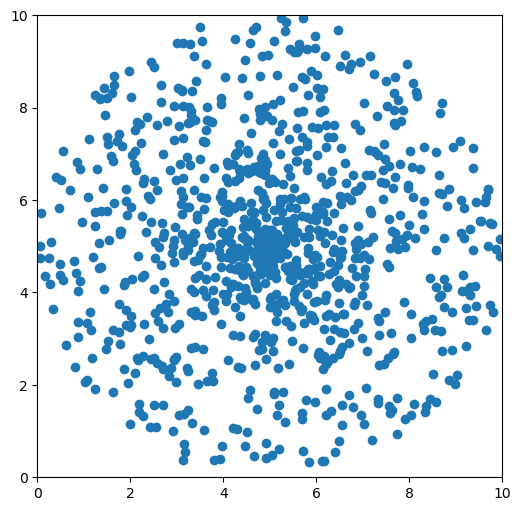

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
len(X)
plt.axis([0, 10, 0, 10])

In [4]:
X = []
Y=[]
for i in range(1000):
    x=random.randint(0,10)+random.random()
    y=random.randint(0,10)+random.random()
    if ((x-5)**2 + (y-5)**2) >25:
        print('Reject ({0},{1})'.format(x,y))
    else :
        X.append(x)
        Y.append(y)
print(len(X))        

Reject (9.638733242962578,8.085314671682651)
Reject (10.550852611483819,0.6766362464448045)
Reject (10.89275285224035,7.248979892176017)
Reject (0.5809602395930041,8.336891837865835)
Reject (9.645376428941747,0.8768904404911987)
Reject (0.05774842840456629,1.360093237585078)
Reject (2.416549460354012,10.307333886767005)
Reject (10.294730152882057,6.465487272193558)
Reject (6.643274982732487,10.925345042015843)
Reject (1.1848520392338782,9.34147711808905)
Reject (6.590518785193859,0.09641616517125562)
Reject (10.016988433349255,4.563626726859233)
Reject (0.10693311819264639,3.3524276340572503)
Reject (2.0919328973469504,0.440255355621353)
Reject (2.9018688687767966,10.647513710626649)
Reject (1.080188048508464,10.319751369001382)
Reject (2.130245452895071,9.874215704648563)
Reject (7.7155685327903765,10.85316930747795)
Reject (1.42302783436542,9.055282170238597)
Reject (2.4644236789608946,10.048578948905606)
Reject (4.971467051371654,10.94944380343477)
Reject (10.988487515167714,0.28198

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

658


(0.0, 10.0, 0.0, 10.0)

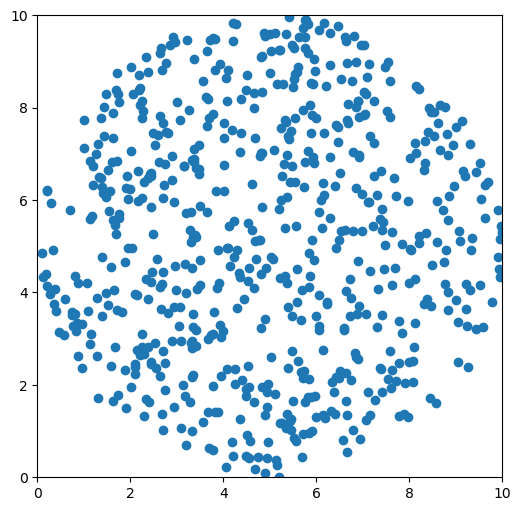

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
print(len(X))
plt.axis([0, 10, 0, 10])

# MH采样

In [7]:
import numpy as np
data = np.random.randn(200)
np.mean(data)

-0.048265359648694765

/tmp/ipykernel_24617/1515892372.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, ax=ax)


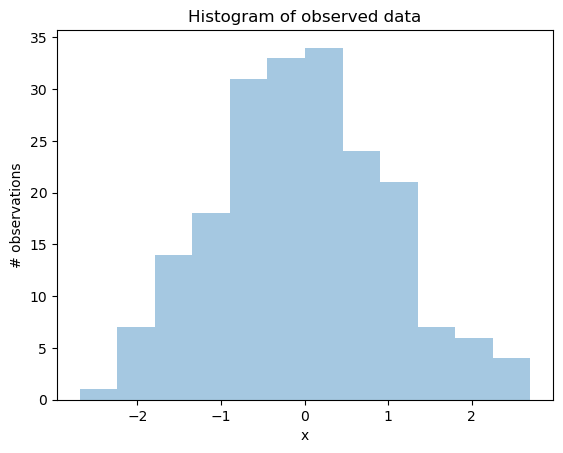

In [8]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

In [9]:
from scipy.stats import norm

In [10]:

def sampler(data, samples=100, mu_init=0.2, proposal_width=0.1, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        mu_proposal = norm(mu_current, proposal_width).rvs()


        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
   
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        

        p_accept = p_proposal / p_current
        

        accept = np.random.rand() < p_accept
        
     
        if accept:
            # Update position
            mu_current = mu_proposal
            posterior.append(mu_current)
        
        
        
    return posterior

In [11]:
sampler(data,samples=5)

[0.2,
 0.19749683916936991,
 0.17648148660968085,
 0.10887340828359475,
 0.05815159079222527]